In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

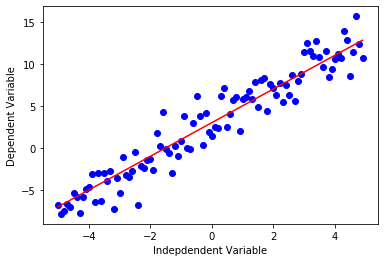

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

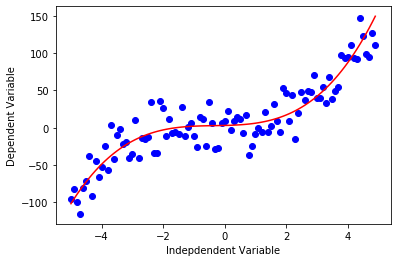

In [6]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

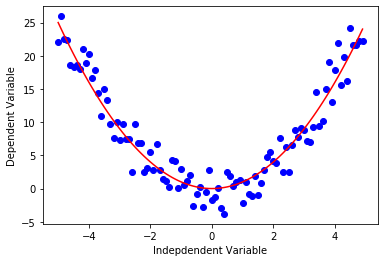

In [8]:
# quadratic
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

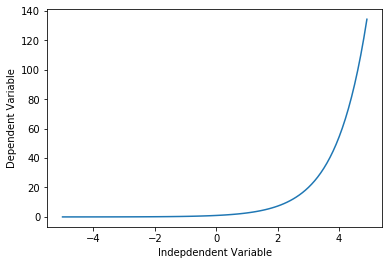

In [10]:
# exponentials
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


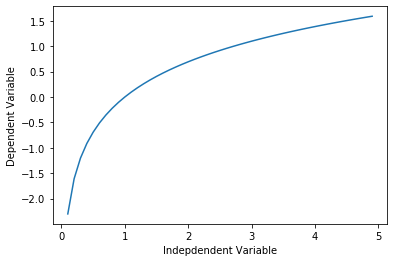

In [11]:
# logarithmic
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

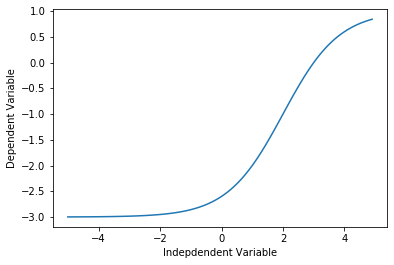

In [12]:
# sigmoid/logistic
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [13]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2019-11-10 08:14:52 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


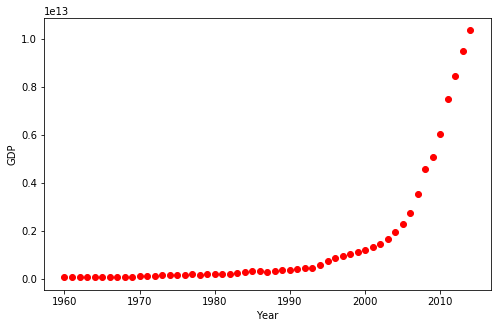

In [14]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

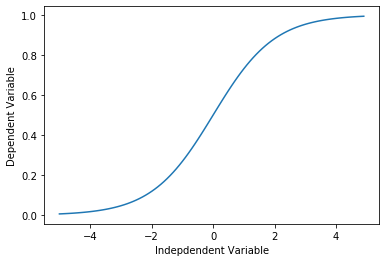

In [15]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

In [17]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

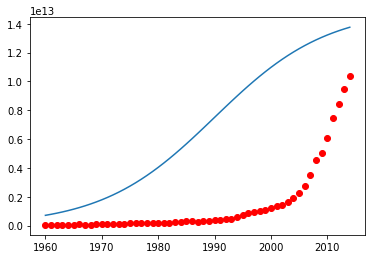

In [18]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [19]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [20]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.447527, beta_2 = 0.997207


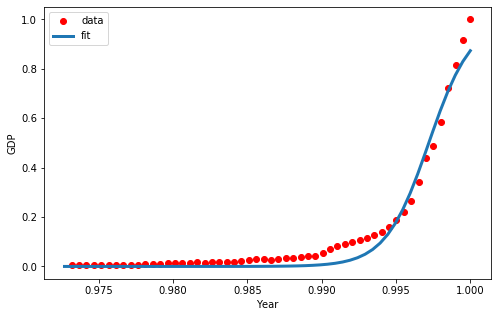

In [21]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()